d:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
d:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from ae_ckpt\model_encoder_encodedDim4_cluaterDim4_unlabel.ckpt
-0.027550523761879386
AUC=0.9568236333796238, CSI = 0.8131313131313131


d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarnin

INFO:tensorflow:sdec_ckpt\model_supervise.ckpt is not in all_model_checkpoint_paths. Manually adding it.


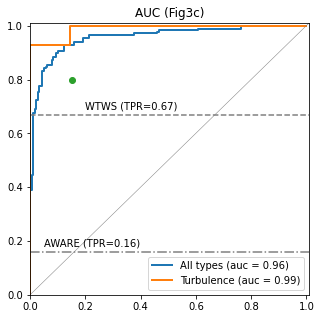

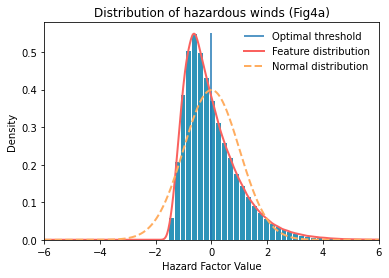

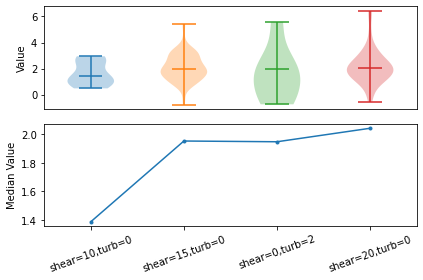

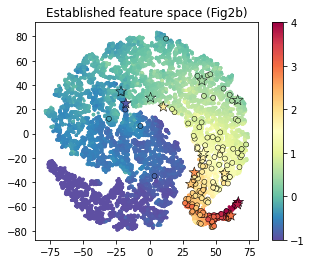

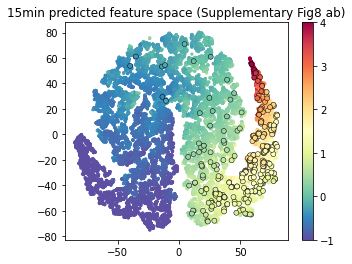

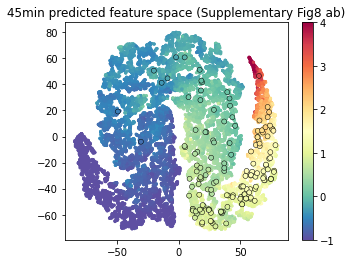

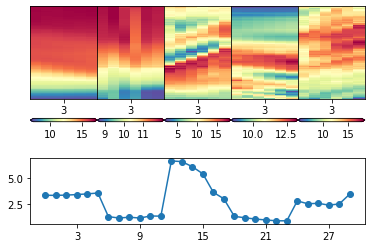

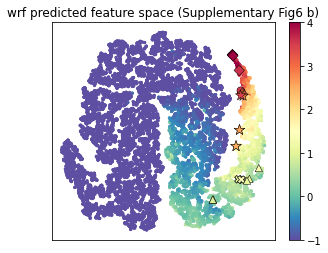

In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import random
from Data_import import data_frame
from model_evaluation import *
import scipy.io as scio
from ClusterNN import cluster_NN,svm_classifier
tf.set_random_seed(1)
np.random.seed(1)
random.seed(1)

corridor_v_r_kashi = scio.loadmat('corridor_v_r_kashi_50m.mat')
corridor_v_r_zhongchuan = scio.loadmat('corridor_v_r_zhongchuan.mat')
corridor_v_r_daxing = scio.loadmat('corridor_v_r_daxing_50m.mat')
corridor_v_r_panzhihua = scio.loadmat('corridor_v_r_panzhihua_50m.mat')

corridor_v_r_kashi = corridor_v_r_kashi['corridor_v_r']#.T
corridor_v_r_zhongchuan = corridor_v_r_zhongchuan['corridor_v_r']#.T
corridor_v_r_daxing = corridor_v_r_daxing['corridor_v_r']#.T
corridor_v_r_panzhihua = corridor_v_r_panzhihua['corridor_v_r']#.T
corridor_v_r = np.vstack((corridor_v_r_kashi.T,corridor_v_r_zhongchuan.T,corridor_v_r_daxing,
                          corridor_v_r_panzhihua))

Data = data_frame(standard = False, calm_train_num = None)
pilot_train_ = Data.pilot_train_v_r
clusternn = cluster_NN()
metric_values = clusternn.train(Data,pilot_train_,train_steps = 2001, BATCH_SIZE = 1024,
                                If_cal_AUC = True, If_plot_intensity = True,
                                If_other_airports = True, other_airports_v = corridor_v_r,
                                If_pred_nn = True, If_pred_wrf = True)